In [186]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [187]:
import re 
import nltk
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set (stopwords.words("english"))

In [188]:
df = pd.read_csv("twitter_data.csv")
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [189]:
df.shape

(24783, 7)

In [190]:
df['labels'] = df['class'].map({0:"Hate Speech Detected",1:"Offensive Language detected",2:"No hate and offensive language"})
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                           labels  
0  No hate and offensive language  
1     Offensive Language detected  
2     Offensive Language detected  
3     Offensive Language detected  
4     Offensive Language detected  


In [191]:
df = df[['tweet','labels']]
df.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate and offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language detected


In [192]:
def clean(text):
    text=str(text).lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('https?://S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    text=[word for word in text.split(' ')if word not in stopword]
    text=" ".join(text)
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["tweet"] = df["tweet"].apply(clean)
print(df.head())

                                               tweet  \
0   rt mayasolov woman shouldnt complain clean ho...   
1   rt  boy dat coldtyga dwn bad cuffin dat hoe  ...   
2   rt urkindofbrand dawg rt  ever fuck bitch sta...   
3             rt cganderson vivabas look like tranni   
4   rt shenikarobert shit hear might true might f...   

                           labels  
0  No hate and offensive language  
1     Offensive Language detected  
2     Offensive Language detected  
3     Offensive Language detected  
4     Offensive Language detected  


In [193]:
x = np.array(df["tweet"])
y = np.array(df["labels"])
print(x)
print(y)
cv = CountVectorizer()
x = cv.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

[' rt mayasolov woman shouldnt complain clean hous amp man alway take trash'
 ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place'
 ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit' ...
 'young buck wanna eat dat nigguh like aint fuckin dis'
 'youu got wild bitch tellin lie'
 'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll ']
['No hate and offensive language' 'Offensive Language detected'
 'Offensive Language detected' ... 'Offensive Language detected'
 'Offensive Language detected' 'No hate and offensive language']


DecisionTreeClassifier()

In [194]:
test_data="i will fuck you"
df = cv.transform([test_data]).toarray()
print(clf.predict(df))

['Offensive Language detected']


In [197]:
from sklearn.svm import SVC

# Instantiate an SVM model
model = SVC(kernel='linear')


In [198]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [209]:
accuracy = model.score(X_test, y_test)
error_rate = 1.0 - accuracy

In [210]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Error rate: {error_rate:.2f}')

Accuracy: 0.89
Error rate: 0.11


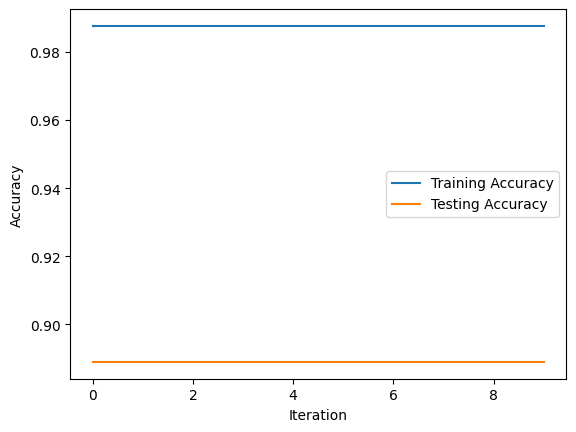

In [205]:
# Train the model and record the accuracy on the training and testing sets at each iteration
training_accuracies = []
testing_accuracies = []
for i in range(10):
  model.fit(X_train, y_train)
  training_accuracies.append(model.score(X_train, y_train))
  testing_accuracies.append(model.score(X_test, y_test))

# Plot the training and testing accuracies over time
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(testing_accuracies, label='Testing Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


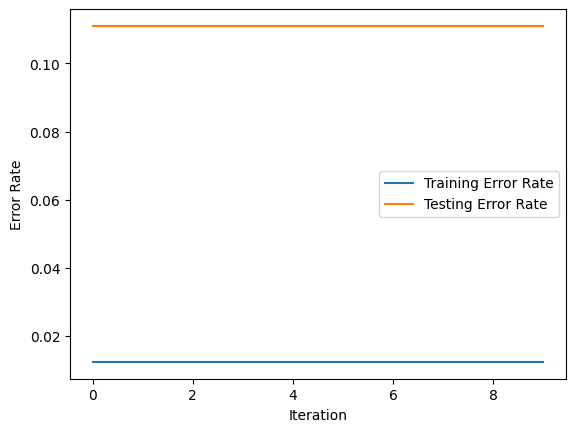

In [208]:
# Train the model and record the error rate on the training and testing sets at each iteration
training_error_rates = []
testing_error_rates = []
for i in range(10):
  model.fit(X_train, y_train)
  training_error_rates.append(1.0 - model.score(X_train, y_train))
  testing_error_rates.append(1.0 - model.score(X_test, y_test))

# Plot the training and testing error rates over time
plt.plot(training_error_rates, label='Training Error Rate')
plt.plot(testing_error_rates, label='Testing Error Rate')
plt.xlabel('Iteration')
plt.ylabel('Error Rate')
plt.legend()
plt.show()


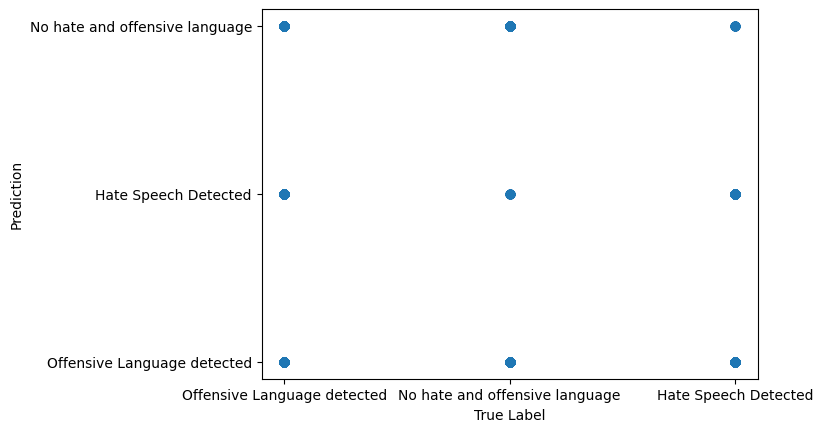

In [206]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Plot the predictions versus the true labels
plt.scatter(y_test, y_pred)
plt.xlabel('True Label')
plt.ylabel('Prediction')
plt.show()
